# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"
btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"

In [5]:
# Fetch current BTC price
btc_price = requests.get(btc_url)
btc_content = btc_price.json()
print(json.dumps(btc_content, indent=4))
btc_price = btc_content['data']['1']['quotes']['USD']['price']
print(btc_price)


{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19528706,
            "total_supply": 19528706,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 34525.0,
                    "volume_24h": 16241805380,
                    "market_cap": 674775025110,
                    "percentage_change_1h": 0.172530840185708,
                    "percentage_change_24h": -0.0385344410451271,
                    "percentage_change_7d": 4.77018673322585,
                    "percent_change_1h": 0.172530840185708,
                    "percent_change_24h": -0.0385344410451271,
                    "percent_change_7d": 4.77018673322585
                }
            },
            "last_updated": 1698712194
        }
    },
    "metadata": {
        "timestamp": 1698712194,
        "num_c

In [6]:
# Fetch current ETH price
eth_price = requests.get(eth_url)
eth_content = eth_price.json()
print(json.dumps(eth_content, indent=4))
eth_price = eth_content['data']['1027']['quotes']['USD']['price']
print(eth_price)



{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120269588,
            "total_supply": 120269588,
            "max_supply": 120269588,
            "quotes": {
                "USD": {
                    "price": 1810.92,
                    "volume_24h": 12296871071,
                    "market_cap": 217996152431,
                    "percentage_change_1h": 0.151824064711775,
                    "percentage_change_24h": 0.96931158373127,
                    "percentage_change_7d": 2.60567709050555,
                    "percent_change_1h": 0.151824064711775,
                    "percent_change_24h": 0.96931158373127,
                    "percent_change_7d": 2.60567709050555
                }
            },
            "last_updated": 1698712202
        }
    },
    "metadata": {
        "timestamp": 1698712202,
        "

In [7]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $41430.00
The current value of your 5.3 ETH is $9597.88


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [10]:
# Format current date as ISO format
today = pd.Timestamp("2023-10-23", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG","SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])


# Preview DataFrame
df_portfolio

AGG                                             \
                           close  high      low trade_count  open    volume   
timestamp                                                                     
2023-10-23 04:00:00+00:00  92.36  92.5  91.5819       35730  91.7  12886000   

                                         SPY                             \
                                vwap   close    high    low trade_count   
timestamp                                                                 
2023-10-23 04:00:00+00:00  92.292074  420.46  424.45  417.8      668638   

                                                         
                             open    volume        vwap  
timestamp                                                
2023-10-23 04:00:00+00:00  419.61  92035097  421.414928

In [11]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"].item()
spy_close_price = df_portfolio["SPY"]["close"].item()

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $92.36
Current SPY closing price: $420.46


In [12]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21023.00
The current value of your 200 AGG shares is $18472.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_portfolio = {'Amount': [my_btc_value+my_eth_value, my_spy_value+my_agg_value]}

# Create savings DataFrame
df_savings = pd.DataFrame(total_portfolio,index=['Crypto','Shares'])

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,51027.876
Shares,39495.000


array([<Axes: ylabel='Amount'>], dtype=object)

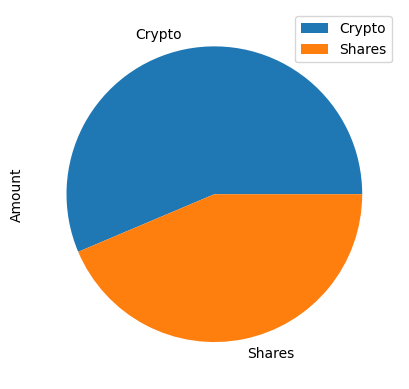

In [14]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True)

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum().item()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations on exceeding your financial goals!")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your financial goals!")
else:
    print(f'You are ${emergency_fund - total_savings} away from reaching your financial goals.')

Congratulations on exceeding your financial goals!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [18]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
     tickers,
     timeframe,
     start = start_date,
     end = end_date
).df
df_stock_data
df_stock_data2 = pd.DataFrame()
df_stock_data2["open"] = df_stock_data["open"].copy()
df_stock_data2["high"] = df_stock_data["high"].copy()
df_stock_data2["low"] = df_stock_data["low"].copy()
df_stock_data2["close"] = df_stock_data["close"].copy()
df_stock_data2["volume"] = df_stock_data["volume"].copy()
df_stock_data2["trade_count"] = df_stock_data["trade_count"].copy()
df_stock_data2["vwap"] = df_stock_data["vwap"].copy()
df_stock_data2["symbol"] = df_stock_data["symbol"].copy()
df_stock_data2

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.605,3608552,15122,110.626939,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.810,3128774,15663,110.864495,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.860,3096337,13984,110.877983,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.140,3052967,15708,111.030002,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.970,2922700,12697,111.027631,AGG
...,...,...,...,...,...,...,...,...
2021-04-26 04:00:00+00:00,417.44,418.2200,416.8111,417.610,53597096,297405,417.511219,SPY
2021-04-27 04:00:00+00:00,417.93,418.1400,416.3000,417.520,52112393,301338,417.481640,SPY
2021-04-28 04:00:00+00:00,417.81,419.0100,416.9000,417.400,51994369,332655,417.739706,SPY


In [19]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data2[df_stock_data2['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data2[df_stock_data2['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data2 = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Display sample data
df_stock_data2.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3608552   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3128774   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  3096337   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3052967   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2922700   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15122  110.626939  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15663  110.864495  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13984  110.877983  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15708  111.030002  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.027631  204.06  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   64747229      263586  207.305695  
2016-05-03 04:00:00+00:00  206.1592  108050343      377523  206.309997  
2016-05-04 04:00:00+00:00  205.0100   94995641      345266  205.086315  
2016-05-05 04:00:00+00:00  204.9700   68425268      280626  205.140615  
2016-05-06 04:00:00+00:00  205.7200   90999800      340162  204.943796

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
     portfolio_data = df_stock_data2,
     weights = [.60,.40],
     num_simulation= 500,
     num_trading_days = 252 * 30
)

In [21]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3608552   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3128774   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  3096337   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3052967   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2922700   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15122  110.626939          NaN  206.92   
2016-05-03 04:00:00+00:00       15663  110.864495     0.001853  206.52   
2016-05-04 04:00:00+00:00       13984  110.877983     0.000451  204.99   
2016-05-05 04:00:00+00:00       15708  111.030002     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.027631    -0.001530  204.06   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   64747229      263586   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  108050343      377523   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   94995641      345266   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   68425268      280626   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   90999800      340162   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.305695          NaN  
2016-05-03 04:00:00+00:00  206.309997    -0.008707  
2016-05-04 04:00:00+00:00  205.086315    -0.005574  
2016-05-05 04:00:00+00:00  205.140615    -0.000195  
2016-05-06 04:00:00+00:00  204.943796     0.003659

In [22]:
MC_thirty_year.portfolio_data

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3608552   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3128774   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  3096337   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3052967   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2922700   
...                           ...       ...       ...      ...      ...   
2021-04-26 04:00:00+00:00  114.74  114.8015  114.6500  114.650  3687396   
2021-04-27 04:00:00+00:00  115.13  115.1300  114.3700  114.370  3962274   
2021-04-28 04:00:00+00:00  114.45  114.4685  114.2000  114.430  7411127   
2021-04-29 04:00:00+00:00  114.14  114.3700  114.0900  114.370  6709216   
2021-04-30 04:00:00+00:00  114.41  114.5150  114.3300  114.490  7705463   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15122  110.626939          NaN  206.92   
2016-05-03 04:00:00+00:00       15663  110.864495     0.001853  206.52   
2016-05-04 04:00:00+00:00       13984  110.877983     0.000451  204.99   
2016-05-05 04:00:00+00:00       15708  111.030002     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.027631    -0.001530  204.06   
...                               ...         ...          ...     ...   
2021-04-26 04:00:00+00:00       13521  114.703085    -0.000871  417.44   
2021-04-27 04:00:00+00:00       12734  114.493905    -0.002442  417.93   
2021-04-28 04:00:00+00:00       24329  114.382062     0.000525  417.81   
2021-04-29 04:00:00+00:00       21243  114.258020    -0.000524  420.32   
2021-04-30 04:00:00+00:00       19584  114.461660     0.001049  417.63   

                                                                              \
                             high       low     close     volume trade_count   
timestamp                                                                      
2016-05-02 04:00:00+00:00  208.18  206.4100  207.9700   64747229      263586   
2016-05-03 04:00:00+00:00  206.80  205.2800  206.1592  108050343      377523   
2016-05-04 04:00:00+00:00  205.85  204.4200  205.0100   94995641      345266   
2016-05-05 04:00:00+00:00  205.98  204.4700  204.9700   68425268      280626   
2016-05-06 04:00:00+00:00  205.77  203.8800  205.7200   90999800      340162   
...                           ...       ...       ...        ...         ...   
2021-04-26 04:00:00+00:00  418.22  416.8111  417.6100   53597096      297405   
2021-04-27 04:00:00+00:00  418.14  416.3000  417.5200   52112393      301338   
2021-04-28 04:00:00+00:00  419.01  416.9000  417.4000   51994369      332655   
2021-04-29 04:00:00+00:00  420.72  416.4400  420.0600   80506526      452194   
2021-04-30 04:00:00+00:00  418.54  416.3400  417.3000   87467317      481284   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.305695          NaN  
2016-05-03 04:00:00+00:00  206.309997    -0.008707  
2016-05-04 04:00:00+00:00  205.086315    -0.005574  
2016-05-05 04:00:00+00:00  205.140615    -0.000195  
2016-05-06 04:00:00+00:00  204.943796     0.003659  
...                               ...          ...  
2021-04-26 04:00:00+00:00  417.511219     0.002088  
2021-04-27 04:00:00+00:00  417.481640    -0.000216  
2021-04-28 04:00:00+00:00  417.739706    -0.000287  
2021-04-29 04:00:00+00:00  418.860662     0.006373  
2021-04-30 04:00:00+00:00  417.640930    -0.006570  

[1259 rows x 16 columns]

In [23]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
import warnings
warnings.filterwarnings("ignore")
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996432,0.991961,0.997182,1.003862,1.002828,0.998456,1.001128,1.002003,1.011926,1.005291,...,0.991759,1.010762,0.992913,1.000011,0.995145,1.004207,1.014183,0.997437,0.998898,1.005634
2,0.991006,0.988619,0.998772,0.998638,1.007682,0.986619,0.994897,0.997604,0.999516,1.001112,...,0.985133,1.022468,0.990088,1.002534,1.003641,0.999128,1.013480,1.003367,0.995103,1.003723
3,0.976227,0.983908,1.000236,1.003265,1.018975,0.989539,0.998751,0.999744,1.007441,0.993052,...,0.977977,1.022429,0.993534,1.013426,1.001077,0.997891,1.024120,1.010296,0.986256,0.996661
4,0.965151,0.980373,0.997576,1.004849,1.000586,0.993966,0.992940,1.001677,1.016006,0.995367,...,0.974726,1.018845,0.992708,1.011552,0.996957,1.002704,1.030713,1.014275,0.993845,0.999316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.920992,31.169134,5.876419,11.325823,18.678234,25.921733,11.377424,4.968376,35.682052,12.914302,...,14.319181,7.773953,12.454698,10.339265,10.128481,11.955410,22.399478,4.384371,5.216159,54.462105
7557,13.993405,31.211782,5.882501,11.455765,18.755178,25.674271,11.414932,4.979412,35.317119,12.914093,...,14.431641,7.768279,12.479396,10.249032,10.182504,11.873705,22.278304,4.435149,5.253368,54.164293
7558,13.921968,31.413550,5.896484,11.423032,18.786555,25.803550,11.327981,4.995466,35.590567,12.922999,...,14.375369,7.793304,12.517040,10.213319,10.273404,12.000422,22.301068,4.436818,5.288621,54.394860
7559,13.964788,31.846108,5.933994,11.503981,18.665409,25.570522,11.326950,4.939629,35.657272,12.999403,...,14.104124,7.863045,12.532938,10.081156,10.211424,11.889223,22.357258,4.426559,5.330294,54.379518


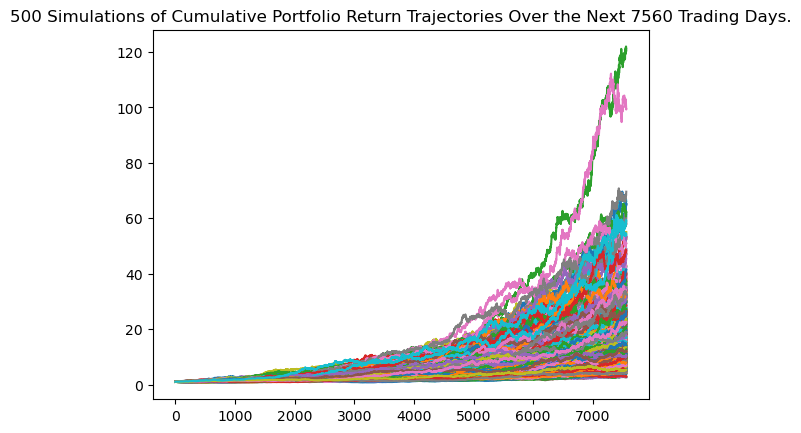

In [24]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

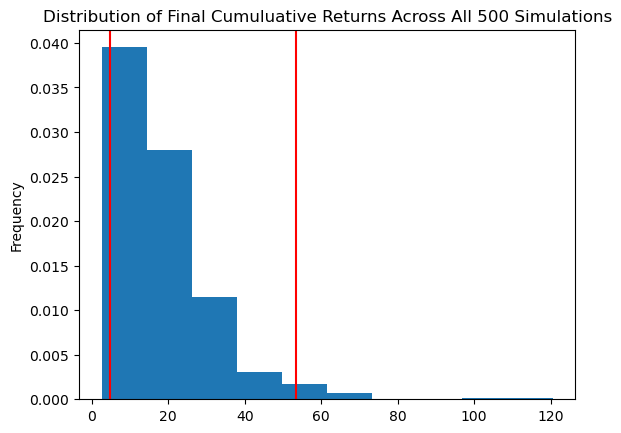

In [25]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

In [26]:
MC_thirty_year.simulated_return#.iloc[-1].describe()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996432,0.991961,0.997182,1.003862,1.002828,0.998456,1.001128,1.002003,1.011926,1.005291,...,0.991759,1.010762,0.992913,1.000011,0.995145,1.004207,1.014183,0.997437,0.998898,1.005634
2,0.991006,0.988619,0.998772,0.998638,1.007682,0.986619,0.994897,0.997604,0.999516,1.001112,...,0.985133,1.022468,0.990088,1.002534,1.003641,0.999128,1.013480,1.003367,0.995103,1.003723
3,0.976227,0.983908,1.000236,1.003265,1.018975,0.989539,0.998751,0.999744,1.007441,0.993052,...,0.977977,1.022429,0.993534,1.013426,1.001077,0.997891,1.024120,1.010296,0.986256,0.996661
4,0.965151,0.980373,0.997576,1.004849,1.000586,0.993966,0.992940,1.001677,1.016006,0.995367,...,0.974726,1.018845,0.992708,1.011552,0.996957,1.002704,1.030713,1.014275,0.993845,0.999316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.920992,31.169134,5.876419,11.325823,18.678234,25.921733,11.377424,4.968376,35.682052,12.914302,...,14.319181,7.773953,12.454698,10.339265,10.128481,11.955410,22.399478,4.384371,5.216159,54.462105
7557,13.993405,31.211782,5.882501,11.455765,18.755178,25.674271,11.414932,4.979412,35.317119,12.914093,...,14.431641,7.768279,12.479396,10.249032,10.182504,11.873705,22.278304,4.435149,5.253368,54.164293
7558,13.921968,31.413550,5.896484,11.423032,18.786555,25.803550,11.327981,4.995466,35.590567,12.922999,...,14.375369,7.793304,12.517040,10.213319,10.273404,12.000422,22.301068,4.436818,5.288621,54.394860
7559,13.964788,31.846108,5.933994,11.503981,18.665409,25.570522,11.326950,4.939629,35.657272,12.999403,...,14.104124,7.863045,12.532938,10.081156,10.211424,11.889223,22.357258,4.426559,5.330294,54.379518


### Retirement Analysis

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean             18.804593
std              13.119136
min               2.587725
25%              10.057845
50%              15.054561
75%              23.900120
max             120.536101
95% CI Lower      4.817296
95% CI Upper     53.315481
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $96345.92 and $1066309.61


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [40]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $28121.44 and $76121.69


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
     portfolio_data = df_stock_data2,
     weights = [.60,.40],
     num_simulation= 500,
     num_trading_days = 252 * 5
)

In [33]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009590,1.005900,1.006603,1.003510,1.002782,0.998946,1.013434,1.000115,1.012199,1.021010,...,0.993245,1.000436,1.005844,0.993162,0.985169,0.999039,1.000938,0.997277,0.998920,1.003977
2,1.012558,0.997039,1.011388,0.997114,1.013410,0.994757,1.005147,0.998378,0.997365,1.006905,...,0.999224,1.002234,1.011643,1.000514,0.987626,0.999572,1.010561,1.002489,1.004634,1.010594
3,1.001134,1.000792,1.006559,1.008015,1.003954,0.995012,1.010202,0.982868,1.003855,1.012367,...,1.001463,1.012712,0.999789,0.999164,0.984786,1.013576,1.006591,1.013886,0.996316,1.014091
4,1.001358,0.992872,1.004860,1.009073,1.002000,0.998469,1.013801,0.995083,1.017783,1.015574,...,1.000451,1.014407,0.993450,1.001938,0.994850,1.011189,1.012625,1.012785,1.001082,1.007395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.249836,2.092907,1.624871,1.886656,1.425016,2.393178,1.450351,2.119075,1.597512,1.261086,...,1.332804,1.884375,1.482482,2.035134,1.181630,1.722500,1.745640,1.678275,1.758707,1.527348
1257,1.239547,2.118640,1.628335,1.884115,1.420956,2.388190,1.433552,2.123510,1.591584,1.252175,...,1.336343,1.896834,1.480098,2.038921,1.174164,1.729728,1.746418,1.682556,1.775067,1.543988
1258,1.254153,2.110450,1.631563,1.890217,1.423976,2.396468,1.426578,2.090911,1.597705,1.254568,...,1.322823,1.889018,1.480228,2.038938,1.175407,1.709622,1.737565,1.674859,1.800797,1.561574
1259,1.266575,2.130130,1.633583,1.885255,1.432092,2.396223,1.425428,2.083150,1.606051,1.255548,...,1.317590,1.911509,1.472441,2.046794,1.176555,1.697666,1.726043,1.699455,1.772989,1.556728


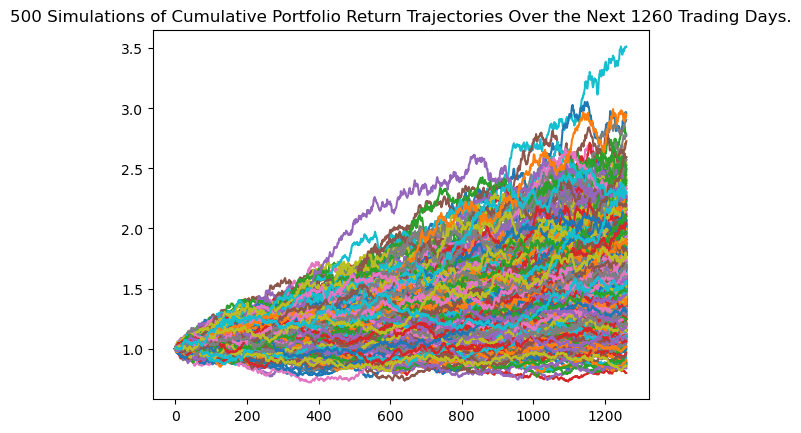

In [34]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()

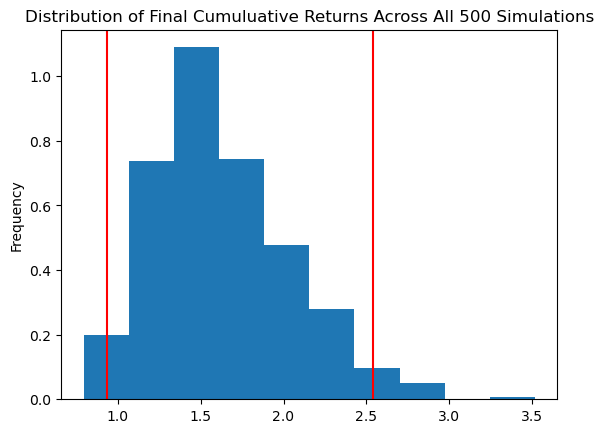

In [35]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.631522
std               0.414918
min               0.796966
25%               1.338733
50%               1.578884
75%               1.879407
max               3.514950
95% CI Lower      0.937381
95% CI Upper      2.537390
Name: 1260, dtype: float64


In [41]:
# Set initial investment


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")